# Explore here

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

In [3]:
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [4]:
total_data.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [5]:
total_data.rename(columns={'19-Oct': '10-19'}, inplace=True)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [7]:
total_data.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [8]:
from sklearn.preprocessing import MinMaxScaler

data_types = total_data.dtypes
column_list = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]


scaler = MinMaxScaler()
scale_features = scaler.fit_transform(total_data[column_list])

total_data_scal = pd.DataFrame(scale_features, index = total_data.index, columns = column_list)
total_data_scal["Heart disease_number"] = total_data["Heart disease_number"]
total_data_scal.head()



,fips,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,0.000000,0.005493,0.005617,0.479430,0.006163,0.589390,0.004417,0.329258,0.004713,0.412648,...,0.348718,0.342246,0.349754,0.005724,0.295455,0.292683,0.297872,0.005564,0.4,3345
1,0.000036,0.021566,0.020490,0.445993,0.021719,0.529693,0.015143,0.287860,0.016781,0.339172,...,0.302564,0.294118,0.315271,0.021536,0.318182,0.317073,0.340426,0.023031,0.6,13414
2,0.000073,0.002453,0.002261,0.431264,0.002389,0.510489,0.002099,0.349599,0.002124,0.419806,...,0.697436,0.700535,0.684729,0.004052,0.613636,0.609756,0.617021,0.003718,1.0,2159
3,0.000109,0.002208,0.002033,0.430636,0.002095,0.497301,0.001945,0.359921,0.002065,0.483782,...,0.410256,0.411765,0.403941,0.002625,0.340909,0.341463,0.361702,0.002490,0.2,1533
4,0.000145,0.005715,0.005872,0.481786,0.006109,0.561604,0.004330,0.310254,0.004576,0.360085,...,0.379487,0.379679,0.384236,0.006307,0.363636,0.365854,0.382979,0.006326,0.2,4101


In [9]:
total_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,0.000000,0.005493,0.005617,0.479430,0.006163,0.589390,0.004417,0.329258,0.004713,0.412648,...,0.348718,0.342246,0.349754,0.005724,0.295455,0.292683,0.297872,0.005564,0.4,3345
1,0.000036,0.021566,0.020490,0.445993,0.021719,0.529693,0.015143,0.287860,0.016781,0.339172,...,0.302564,0.294118,0.315271,0.021536,0.318182,0.317073,0.340426,0.023031,0.6,13414
2,0.000073,0.002453,0.002261,0.431264,0.002389,0.510489,0.002099,0.349599,0.002124,0.419806,...,0.697436,0.700535,0.684729,0.004052,0.613636,0.609756,0.617021,0.003718,1.0,2159
3,0.000109,0.002208,0.002033,0.430636,0.002095,0.497301,0.001945,0.359921,0.002065,0.483782,...,0.410256,0.411765,0.403941,0.002625,0.340909,0.341463,0.361702,0.002490,0.2,1533
4,0.000145,0.005715,0.005872,0.481786,0.006109,0.561604,0.004330,0.310254,0.004576,0.360085,...,0.379487,0.379679,0.384236,0.006307,0.363636,0.365854,0.382979,0.006326,0.2,4101


In [10]:
total_data_scal.duplicated().sum()

0

In [11]:
total_data_scal.isnull().sum()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
10-19                     0
                         ..
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Heart disease_number      0
Length: 106, dtype: int64

In [12]:
correlated_data = total_data_scal.corr()

In [13]:
threshold = 0.2

In [14]:
#chosen target variable as column'anyprevalence of disease'
correlated_columns = (abs(correlated_data) > threshold)['anycondition_prevalence']
dropped_columns = (abs(correlated_data) <= threshold)['anycondition_prevalence']
dropped_columns

fips                       True
TOT_POP                   False
0-9                       False
0-9 y/o % of total pop     True
10-19                     False
                          ...  
CKD_Lower 95% CI          False
CKD_Upper 95% CI          False
CKD_number                False
Urban_rural_code          False
Heart disease_number      False
Name: anycondition_prevalence, Length: 106, dtype: bool

In [15]:
data = total_data_scal[total_data_scal.columns[correlated_columns]]

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
prevalence_column = [col for col in data.columns if 'prevalence' in col]
print (prevalence_column)

['anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']


Text(0, 0.5, 'each disease prevalence')

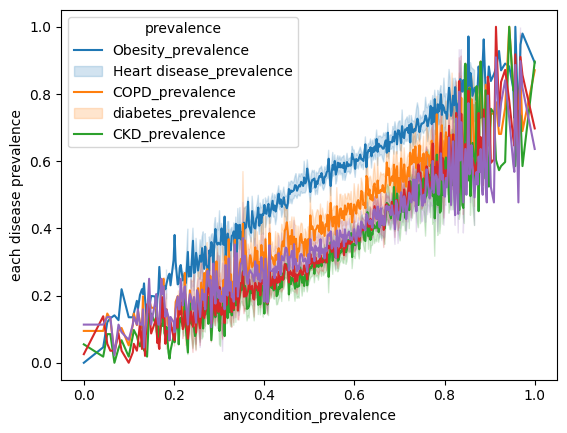

In [18]:
for col in prevalence_column[1:]:
    sns.lineplot(data=data, x='anycondition_prevalence', y=col, legend='auto')
plt.legend(title = 'prevalence', labels = prevalence_column[1:])
plt.ylabel('each disease prevalence')
    

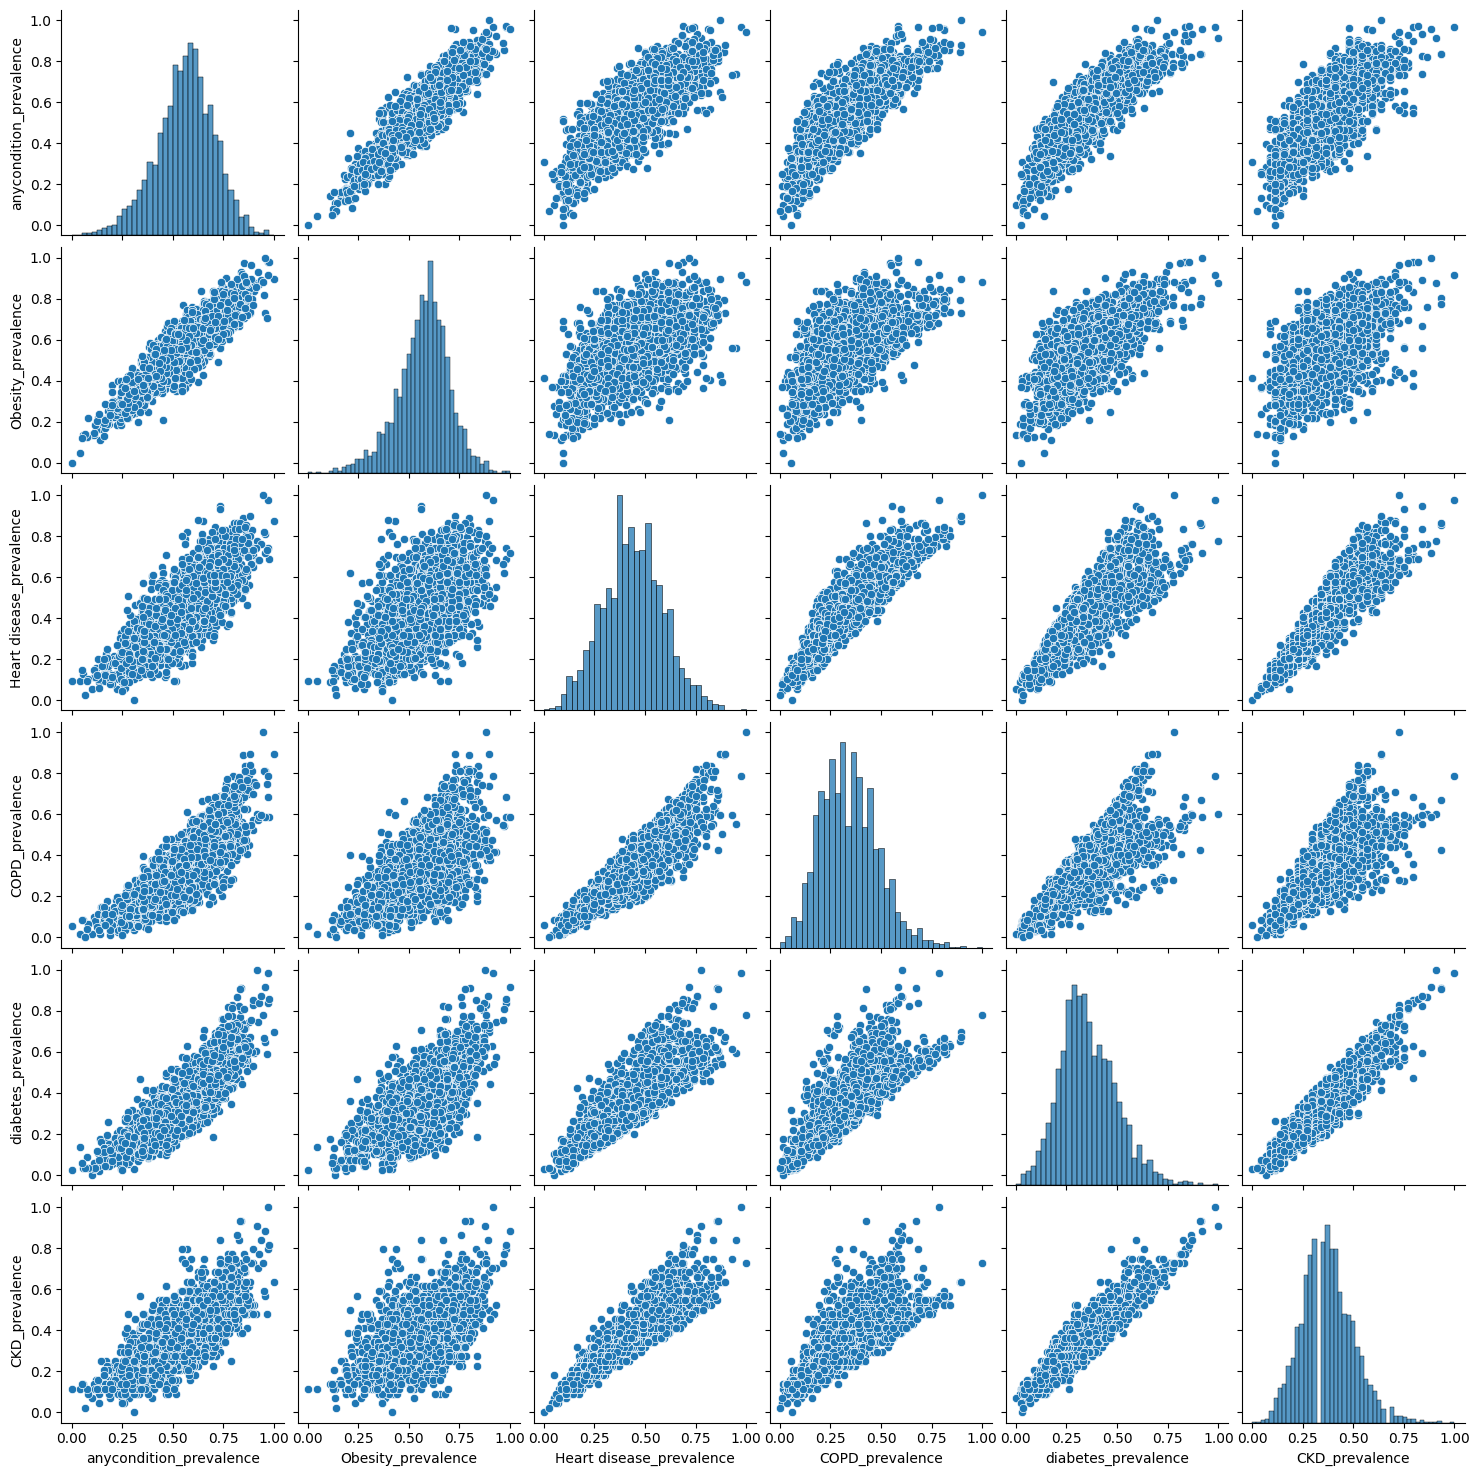

In [19]:
sns.pairplot(data[prevalence_column])

In [20]:
correlated_data.loc['diabetes_prevalence', 'anycondition_prevalence']

0.8502185659634848

In [21]:
from sklearn.metrics import r2_score

model =[LinearRegression, Lasso, Ridge(alpha=10)]

for selected_model in models:
    if m == LinearRegression():     
        model.fit(X_train, Y_train)
        Y_pred = model.fit(X_test)
        print(("R2 Scores for Linear Regression, Lasso and Ridge:") r2_score(Y_pred, Y_test))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1690976547.py, line 9)

In [ ]:
model =[LinearRegression, Lasso, Ridge(alpha=10)]

for alpha in range(0,20):
    if m == LinearRegression():     
        print("test regression")
